In [1]:
import pandas as pd 
pd.set_option('display.max_columns', None) #display max columns setting
pd.set_option('display.max_rows', None) #display max row setting
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## 1. Load Data

In [2]:
df=pd.read_excel(r'C:\Users\ry2597\Downloads\default of credit card clients.xls', skiprows=[0] )# skip 1st row

In [3]:
df.head() # time from April to September, 2005

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


## 2. Data Structure

In [4]:
print ('Number of records:', df.shape[0]) 
print ('Number of columns: ', df.shape[1] )

Number of records: 30000
Number of columns:  25


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

Above list shows that this dataset is completed,  no missing values and data type is consistant as integer 64. So we don't need to worry about converting data types or dealing with missing data. 

## 3. Data Exploration

### 3.1 Data Statistics

In [6]:
df.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


From the above statistics table, we have some interesting findings below: 

1. LIMIT_BAL: Minimum balance approved by bank is 10,000, maximum balance approved is 1 million. The range is broad and sparse. 
2. EDUCATION: min class 0 and max class 6, which are not defined in the metadata. Our metadata only shows: X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). So we need to explore details further. 
3. MARRIAGE: The same confusing or missing information happens in 'MARRIAGE' column. Stats shows min class 0 which is undefined, we only knows X4: Marital status (1 = married; 2 = single; 3 = others). Further exploration needed. 
4. Payment status (PAY_0 to PAY_6): min is -2 and it has no definition for what -2 stands for. Also, no definition for what status 0 stands for.
5. Bill statement (BILL_AMT1 to BILL_AMT6): all min bill amount is negative, why bill amount can be a huge negative number like this? need futhur explore. 

Outlier detection is happened when the numberic range is very sparse. For variables like LIMIT_BAL, BILL_AMT, PAY_AMT usually with very sparse range. However, they are actual payments, we don't delete them but we can create calculations to find new features for model training, avoding scale sensitivity.

As data information descriped, Payment status means the repayment in each month. In order to keep same naming logic as  BILL_AMT and PAY_AMT, I'd like to rename PAY_0 as PAY_1, which means the repayment status in September 2005. 
For typing convient, I'd like to rename default payment next month as default. 

In [7]:
df = df.rename(columns={'PAY_0': 'PAY_1',
                       'default payment next month': 'default'}) #rename

### 3.2 Data Distribution 

2    18112
1    11888
Name: SEX, dtype: int64

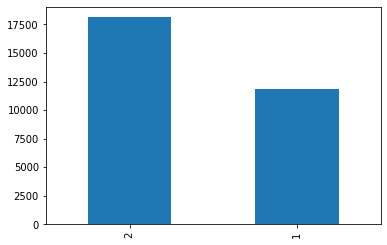

In [8]:
df.SEX.value_counts().plot(kind = 'bar')
df.SEX.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

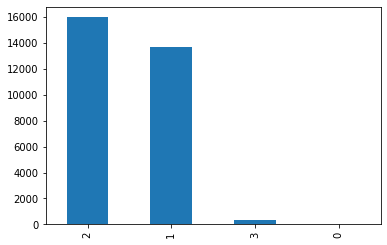

In [9]:
df.MARRIAGE.value_counts().plot(kind = 'bar')
df.MARRIAGE.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

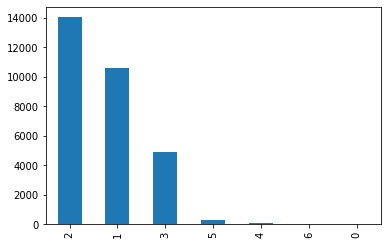

In [10]:
df.EDUCATION.value_counts().plot(kind = 'bar')
df.EDUCATION.value_counts()

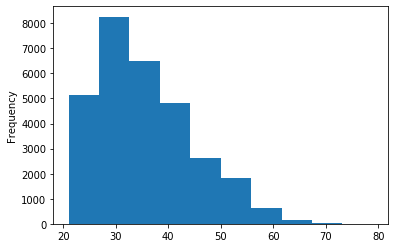

In [11]:
df.AGE.plot(kind='hist')

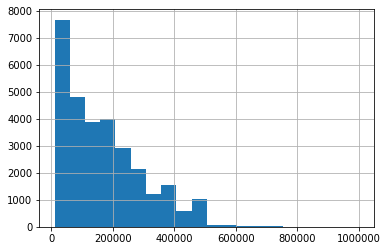

In [12]:
df.LIMIT_BAL.hist(bins=20)

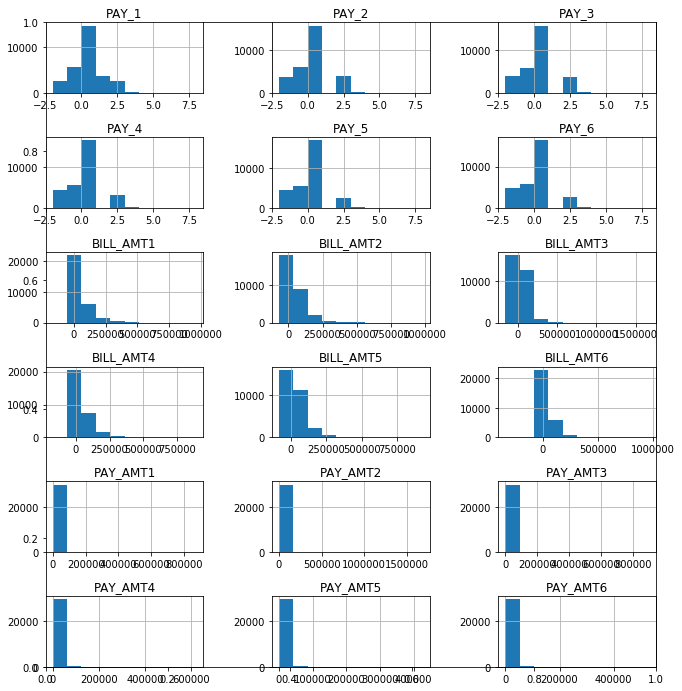

In [13]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig, ax = plt.subplots(figsize=(10,10))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.   
    plt.show()

cols=df[['PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(cols, cols.columns,6, 3, 10)

From above distribution, we found in this dataset, the card holder population has the below cases: 

1. Number of Female card holders is larger than the number of male card holders.
2. Single status > Married > Others. While we don't know what is category 0, it only has very small amount, we can combine it with 3. Because we don't want the tiny amount of categories to impact on our model bais. 
3. University > Graduate > High school > 5 > Others > 6 > 0. Category 6 and 0 have very small amount, category 5 is larger than other, but we can combine them to category 'other' 4. 
4. Majority of credit card holders falls into age 20-40 years, it's a fairly young age market. 
5. Majority of balance limits is less then 50k. Right skewed. 
6. PAY_N, BAL_AMT_N, PAY_AMT_N are right skwed varaibles and data sparse. In variable PAY_N, negative classes like 0, -1, -2 are the majority class among all other classes. According to definition, what is delay payment status -2 and 0?

### New Assumptions : category reclassification

1. For variable Education, Marriage, we replace all undefined categories to 'other'. Those very low amount may overfit the model because the examples are simply too few to generalize properly.

In [14]:
df.loc[((df.EDUCATION >= 4)|(df.EDUCATION == 0)), 'EDUCATION'] = 4 # replace 5, 6, 0 with 4
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3 #replace 0 with 3

In [15]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [16]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

2. Pay_N variable status is tricky here. When we exclude pay duly status (status = -1), other over due payment default rate is over 80% which is not reasonable..so for logical explaination, we assume undefined status 0 and -2 belongs to pay duly status as 0. After change, default rate is much more reasonable.

In [17]:
dfdp=df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
data={'Month':['April','May','Jun','July','Augest','September'],
      'Default rate':[((30000-dfdp['PAY_5'].value_counts()[-1])/300), # (total counts-pay_duly counts)/total counts, remove 100 to change to percentage
                      ((30000-dfdp['PAY_5'].value_counts()[-1])/300),
                      ((30000-dfdp['PAY_4'].value_counts()[-1])/300),
                      ((30000-dfdp['PAY_3'].value_counts()[-1])/300),
                      ((30000-dfdp['PAY_2'].value_counts()[-1])/300),
                      ((30000-dfdp['PAY_1'].value_counts()[-1])/300)]
      }
dfdpm=pd.DataFrame(data)
dfdpm

,Month,Default rate
0,April,81.536667
1,May,81.536667
2,Jun,81.043333
3,July,80.206667
4,Augest,79.833333
5,September,81.046667


In [18]:
fil = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df.loc[fil, 'PAY_1'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0

In [19]:
dfdp=df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
data={'Month':['April','May','Jun','July','Augest','September'],
      'Default rate':[((30000-dfdp['PAY_5'].value_counts()[0])/300), # (total counts-pay_duly counts)/total counts, remove 100 to change to percentage
                      ((30000-dfdp['PAY_5'].value_counts()[0])/300),
                      ((30000-dfdp['PAY_4'].value_counts()[0])/300),
                      ((30000-dfdp['PAY_3'].value_counts()[0])/300),
                      ((30000-dfdp['PAY_2'].value_counts()[0])/300),
                      ((30000-dfdp['PAY_1'].value_counts()[0])/300)]
      }
dfdpm=pd.DataFrame(data)
dfdpm

,Month,Default rate
0,April,9.893333
1,May,9.893333
2,Jun,11.700000
3,July,14.043333
4,Augest,14.793333
5,September,22.726667


### Imbalanced data problem

Credit card default cases is unbalanced data distribution problem. Like the analysis here, default rate of our data is 28.4%. Imbalanced distribution has a problem is that when we split the datasets, less default cases invlove into our model training, which means that we may confront a model generalization problem, the model not representing the general case. We need to consider to adopt over-sampling or under-sampling methods when split data to build approriate models.

Distribuition of Non-default(0) and Default(1):  77.88 : 22.12
Default is 28.40267077555213% of our data.
0    23364
1     6636
Name: default, dtype: int64


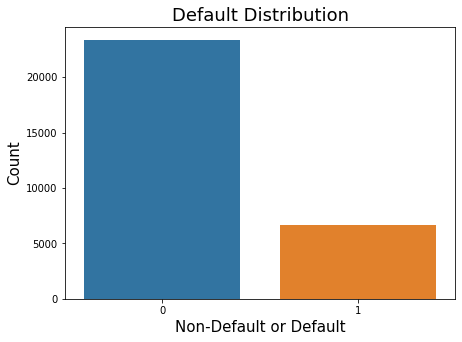

In [20]:
print("Distribuition of Non-default(0) and Default(1): ", round(df['default'].value_counts()[0]/len(df) * 100,2),':', round(df['default'].value_counts()[1]/len(df) * 100,2))
print('Default is {}% of our data.'.format(df['default'].value_counts()[1] / float(df['default'].value_counts()[0])*100))
print(df["default"].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df['default'])
plt.title('Default Distribution', fontsize=18)
plt.xlabel('Non-Default or Default', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

## 4. Data Visualizations and Business Insights about Customer Profile

#### Man is more likely to default than woman.
Approximately 60.4% of the customers in the dataset are female, and the remaining 39.6% male. The percentage of defaults among men is 24% and 21% among women. 

default,0,1,percent
SEX,,,
1,9015,2873,0.24
2,14349,3763,0.21


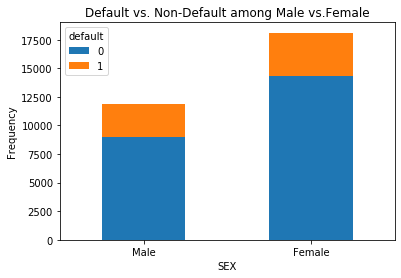

In [21]:
gender = df.groupby(['SEX', 'default']).size().unstack(1)

gender.plot(kind='bar', stacked = True) #stack chart, set bar width

plt.title("Default vs. Non-Default among Male vs.Female")
plt.ylabel("Frequency")

ind = np.arange(2)    # the x locations for the groups: male, female
plt.xticks(ind, ('Male', 'Female'), rotation=0) # set xticks location, text, rotation

gender['percent'] = round((gender[1]/(gender[0] + gender[1])),2)
gender

#### University and High School education level is easy to default than Graduate.
University is the most common level of education in the dataset, followed by Graduate school and High school. The percentage of customers of the dataset are respectively: 47%, 35%, and 16%, 2%. About default rate, “High school” at a default rate of 25%, “University” at 24%, and “Graduate school” at 20%, “Other” at 7%.


default,0,1,percent
EDUCATION,,,
1,8549,2036,0.19
2,10700,3330,0.24
3,3680,1237,0.25
4,435,33,0.07


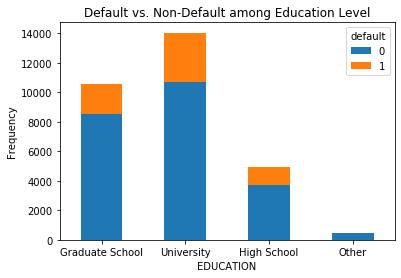

In [22]:
education = df.groupby(['EDUCATION', 'default']).size().unstack(1)
education.plot(kind='bar', stacked = True)

plt.title("Default vs. Non-Default among Education Level")
plt.ylabel("Frequency")
ind = np.arange(4)    # the x locations for the groups
plt.xticks(ind, ('Graduate School', 'University', 'High School','Other'), rotation=0)

def corr_2_cols(Col1, Col2):
    res = df.groupby([Col1, Col2]).size().unstack()
    res['percent'] = round((res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]])),2)
    return res

corr_2_cols('EDUCATION', 'default')



#### Married status is more likly to default than Single status.
“Married” and “Single”, with respective proportions of 53%,
46%, and the group “Other” is only 1% of the customers. Married customers has 23% default rate. Single customers default are slightly less with 21% defaults. The “Other”  has 24% of default rate. 'Other' category may infer like 'divorce' or 'vidow'. 

default,0,1,percent
MARRIAGE,,,
1,10453,3206,0.23
2,12623,3341,0.21
3,288,89,0.24


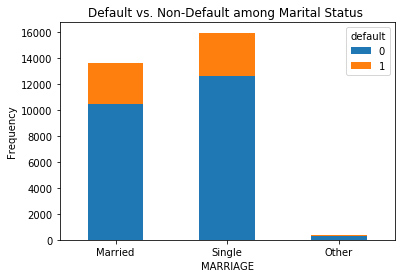

In [23]:
married = df.groupby(['MARRIAGE', 'default']).size().unstack(1)
married.plot(kind='bar', stacked = True)

plt.title("Default vs. Non-Default among Marital Status ")
plt.ylabel("Frequency")
ind = np.arange(3)    # the x locations for the groups
plt.xticks(ind, ('Married', 'Single', 'Other'), rotation=0)

corr_2_cols('MARRIAGE', 'default')

#### Customer with low limt balance is more likely to default . 
Most of customers has a balance limit less than 300,000 NT dollar. Balance limit range of the dataset is between 10k and 1 million. We can see that lower balance limits higher default ratio. For limit range 10k to 50k is at highest default rate with 32%. Limits under 150k is at higher ration with over 20% default rate. Limits at 500k to 600k expose to irregular high defaults.  

Text(0.5, 1.0, 'Default vs. Non-Default among Balance Limits ')

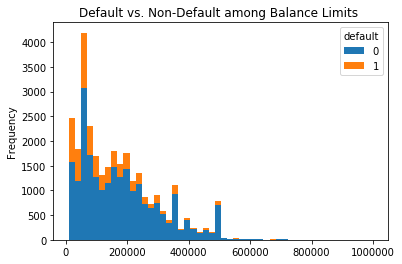

In [24]:
df.pivot(columns='default').LIMIT_BAL.plot(kind = 'hist', stacked=True, bins=50)
plt.title("Default vs. Non-Default among Balance Limits ")
#corr_2_cols('LIMIT_BAL', 'default')#collapse default table, run the default rate ratio if needed

In [25]:
dataclr=df
dataclr.loc[((dataclr['LIMIT_BAL'] > 0) & (dataclr['LIMIT_BAL'] <= 50000)) , 'limit'] = '[1,5]'
dataclr.loc[((dataclr['LIMIT_BAL'] > 50000) & (dataclr['LIMIT_BAL'] <= 100000)) , 'limit'] = '(5,10]'
dataclr.loc[((dataclr['LIMIT_BAL'] > 100000) & (dataclr['LIMIT_BAL'] <= 150000)) , 'limit'] = '(10,15]'
dataclr.loc[((dataclr['LIMIT_BAL'] > 150000) & (dataclr['LIMIT_BAL'] <= 200000)) , 'limit'] = '(15,20]'
dataclr.loc[((dataclr['LIMIT_BAL'] > 200000) & (dataclr['LIMIT_BAL'] <= 300000)) , 'limit'] = '(20,30]'
dataclr.loc[((dataclr['LIMIT_BAL'] > 300000) & (dataclr['LIMIT_BAL'] <= 400000)) , 'limit'] = '(30,40]'
dataclr.loc[((dataclr['LIMIT_BAL'] > 400000) & (dataclr['LIMIT_BAL'] <= 500000)) , 'limit'] = '(40,50]'
dataclr.loc[((dataclr['LIMIT_BAL'] > 500000) & (dataclr['LIMIT_BAL'] <= 600000)) , 'limit'] = '(50,60]'
dataclr.loc[((dataclr['LIMIT_BAL'] > 600000) & (dataclr['LIMIT_BAL'] <= 800000)) , 'limit'] = '(60,80]'
dataclr.loc[((dataclr['LIMIT_BAL'] > 800000) & (dataclr['LIMIT_BAL'] <= 1000000)) , 'limit'] = '(80,100]'
data_clr=dataclr.groupby(['limit'])[['default']].sum()
data_clr['derate']=dataclr.groupby(['limit'])[['default']].sum()/dataclr.groupby(['limit'])[['default']].count()
data_clr.reindex(['[1,5]','(5,10]','(10,15]','(15,20]', '(20,30]', '(30,40]', '(40,50]',  '(50,60]',
       '(60,80]', '(80,100]'])

,default,derate
limit,,
"[1,5]",2440,0.317874
"(5,10]",1244,0.257984
"(10,15]",825,0.211430
"(15,20]",710,0.178482
"(20,30]",812,0.160506
"(30,40]",388,0.140631
"(40,50]",194,0.121402
"(50,60]",17,0.133858
"(60,80]",6,0.076923


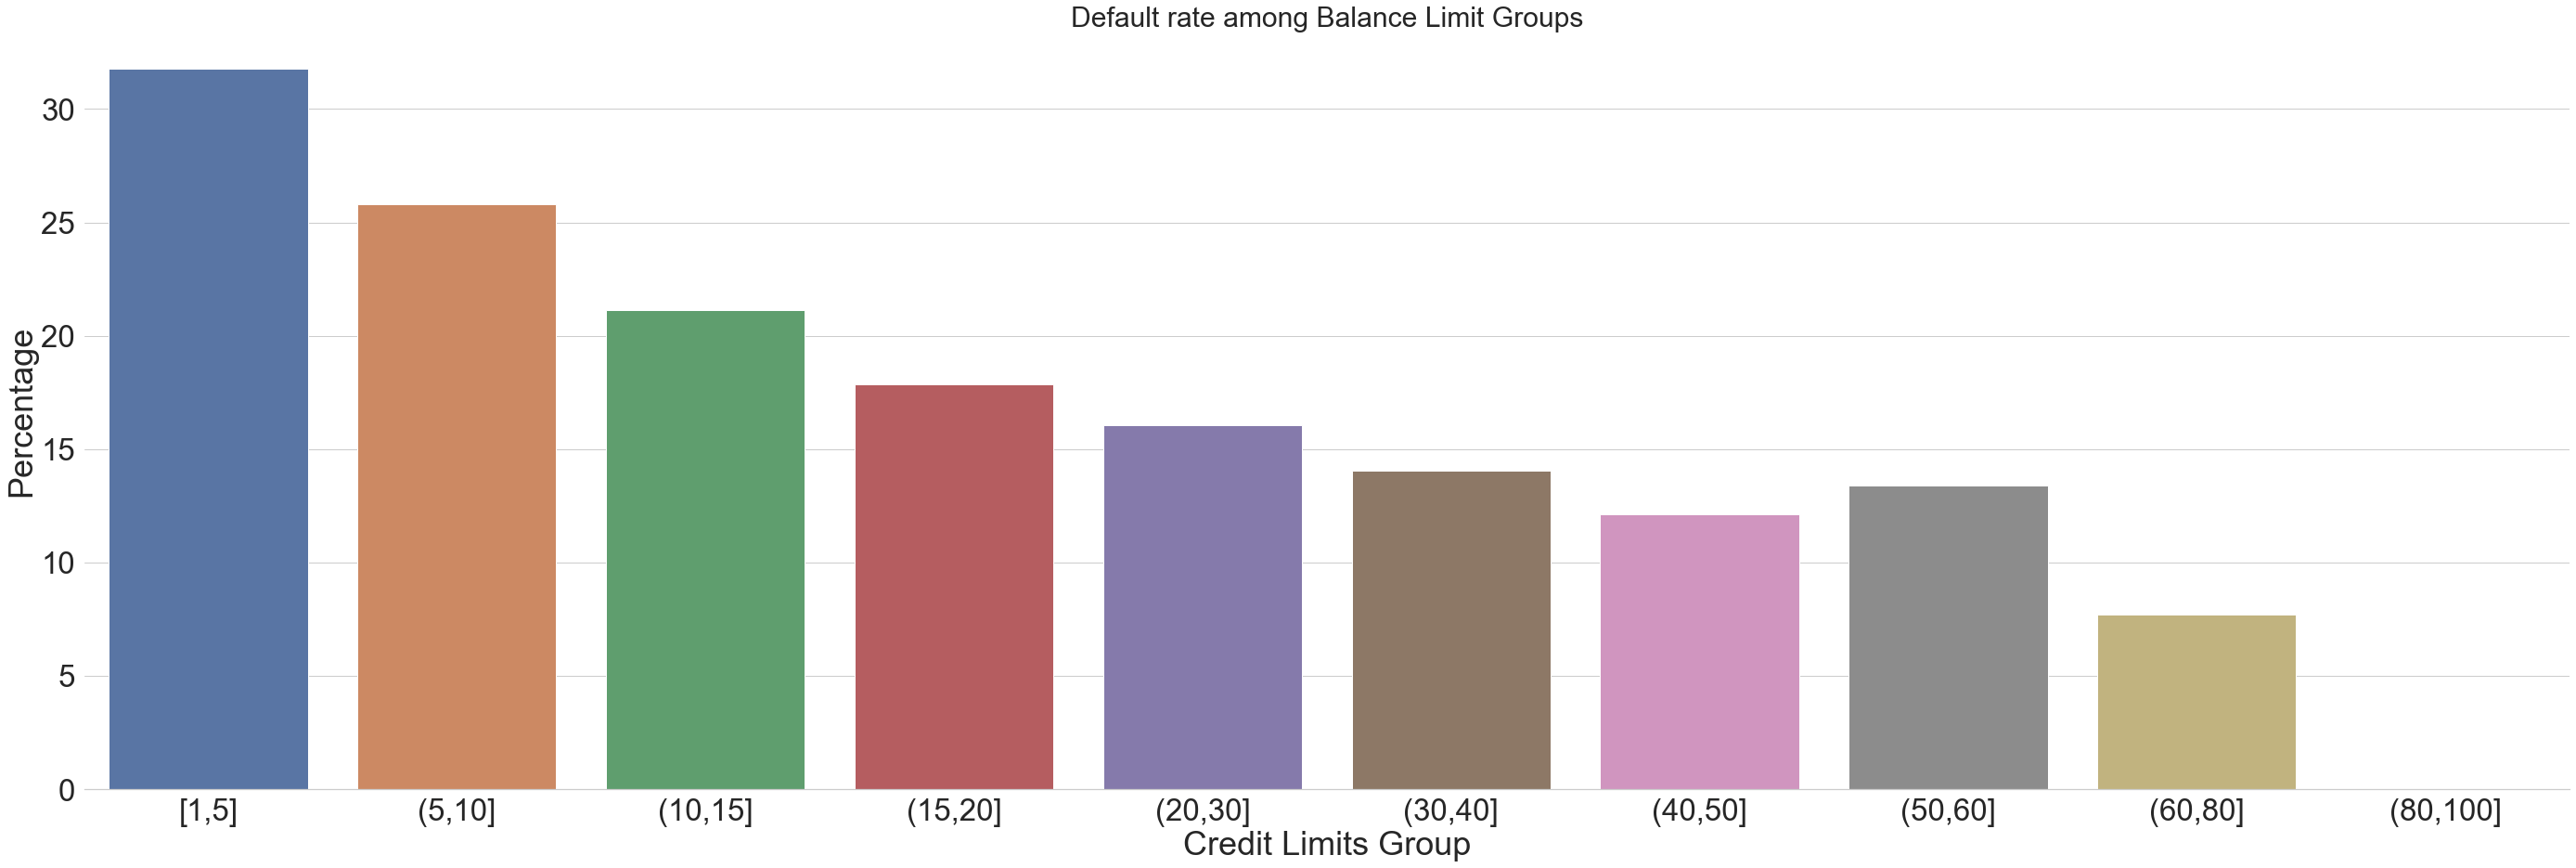

In [26]:
sns.set(style="whitegrid",font="Arial",font_scale=3)
plt.rcParams['figure.figsize'] = [48, 15]
g=sns.barplot(x=data_clr.index,y=data_clr['derate']*100,data=data_clr,order=['[1,5]','(5,10]','(10,15]','(15,20]', '(20,30]', '(30,40]', '(40,50]',  '(50,60]',
       '(60,80]', '(80,100]']) 
sns.despine(left=True)
g.set( ylabel="Percentage",xlabel="Credit Limits Group")
plt.title('Default rate among Balance Limit Groups',size = 30)
plt.show()

#### Youngest and elder customers confront much higher default rate.

Customer common age is between 25-40 years old. However, according to default rate of age groups, age at 70-75 has highest default rate 36%, followed by the youngest group at 20-25 at 27%. We can see the youngest customer usually in their college age and our education level shows that University students has high default rate also. For the elder customers, they may lose financial supports.
If you run the details table, age between 27-39 has lower default rate at 21%, customer in this age group has higher payment ability. Age after 48, customer has higher default rate among 28%-33%. Age between 22-25 defaults at 25%. 

Text(0.5, 1.0, 'Default vs. Non-Default among Age ')

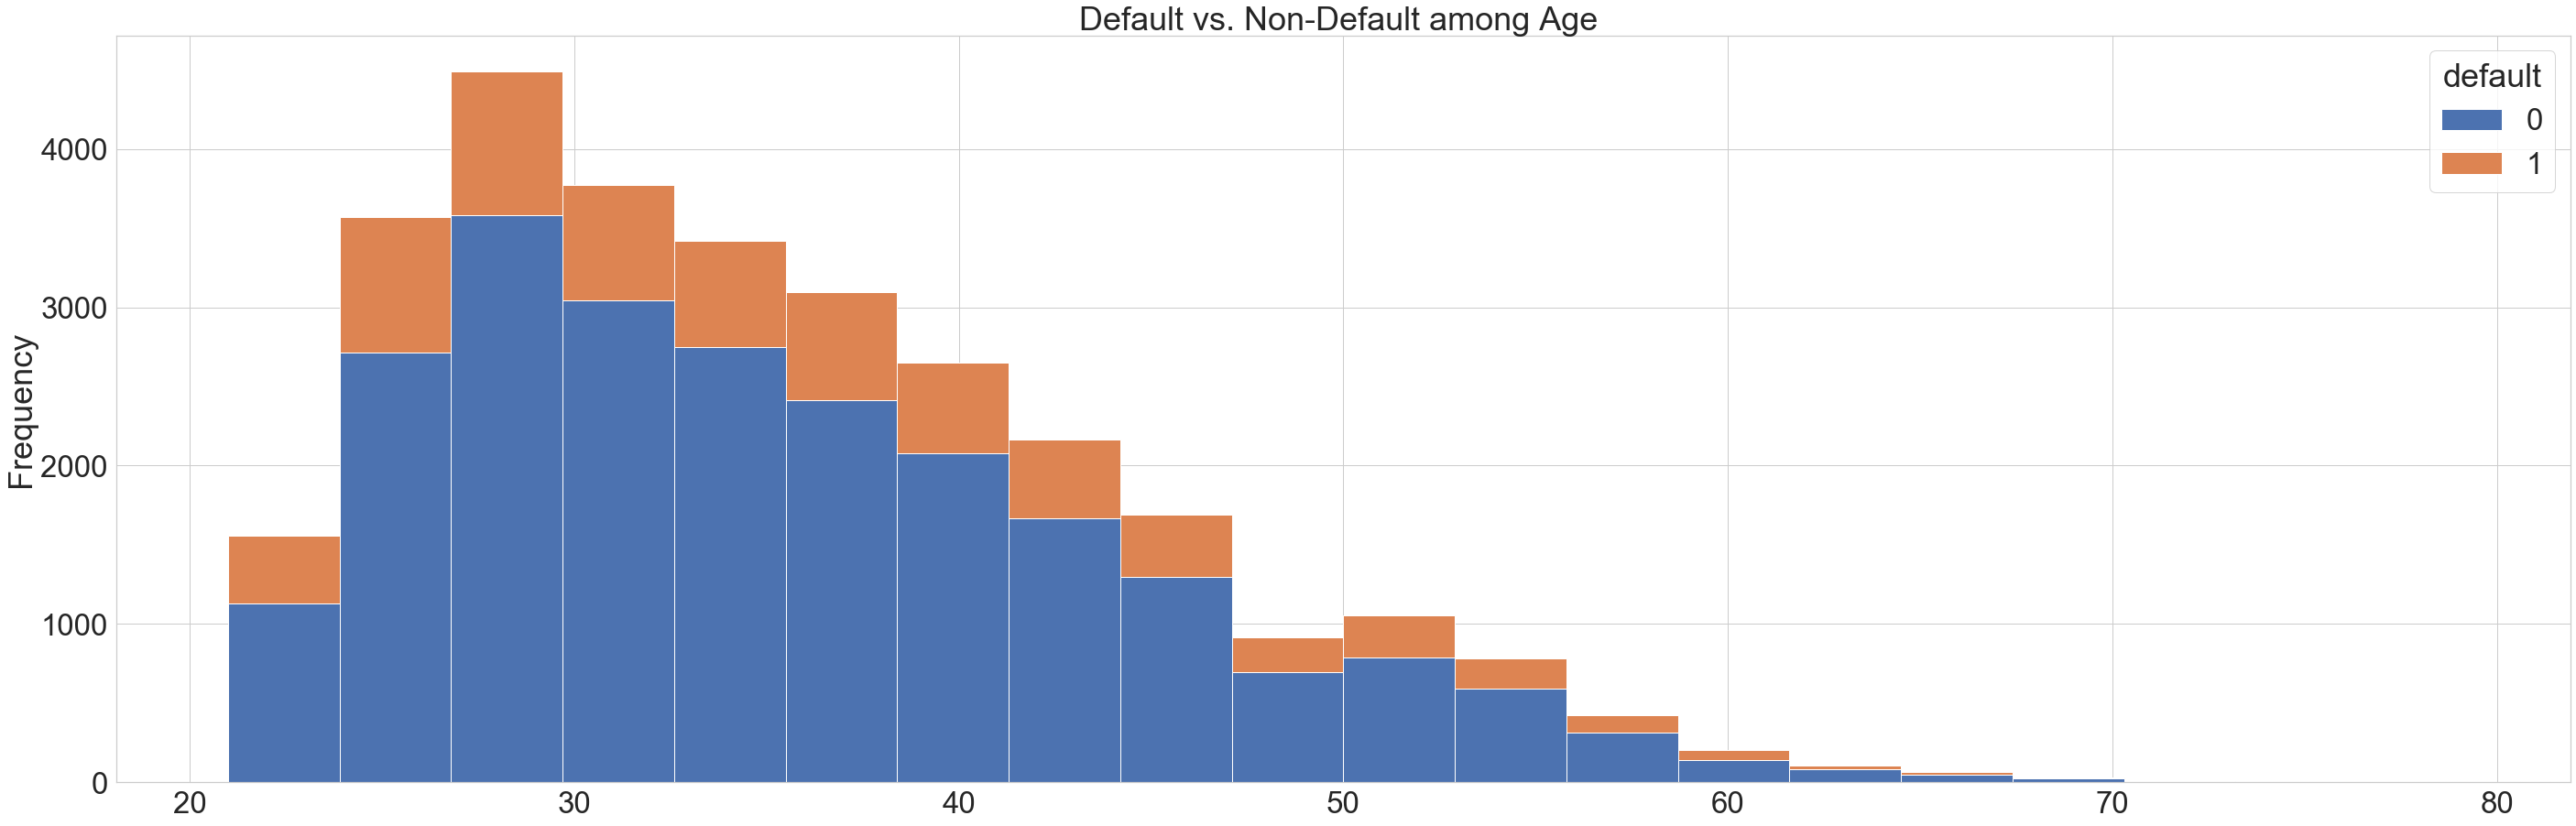

In [27]:
df.pivot(columns='default').AGE.plot(kind = 'hist', stacked=True, bins=20)
plt.title("Default vs. Non-Default among Age ")
#corr_2_cols('AGE', 'default') #collapse default table detail, run the default rate ratio if needed

In [28]:
df['AgeBin'] = 0 
df.loc[((df['AGE'] > 20) & (df['AGE'] < 30)) , 'AgeBin'] = '(20,30)'
df.loc[((df['AGE'] >= 30) & (df['AGE'] < 40)) , 'AgeBin'] = '[30,40)'
df.loc[((df['AGE'] >= 40) & (df['AGE'] < 50)) , 'AgeBin'] = '[40,50)'
df.loc[((df['AGE'] >= 50) & (df['AGE'] < 60)) , 'AgeBin'] = '[50,60)'
df.loc[((df['AGE'] >= 60) & (df['AGE'] < 70)) , 'AgeBin'] = '[60,70)'
df.loc[((df['AGE'] >= 70) & (df['AGE'] < 81)) , 'AgeBin'] = '[70,81)'
dataage=df[['AGE','default']]
dataage['AGEBIN'] = pd.cut(df['AGE'], bins = np.linspace(20, 80, num = 13))
dataage1=dataage.groupby('AGEBIN').mean()
dataage1

C:\Users\ry2597\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,AGE,default
AGEBIN,,
"(20.0, 25.0]",23.724619,0.266598
"(25.0, 30.0]",28.056847,0.201484
"(30.0, 35.0]",32.964803,0.194272
"(35.0, 40.0]",37.885499,0.216189
"(40.0, 45.0]",42.859085,0.221359
"(45.0, 50.0]",47.847083,0.250417
"(50.0, 55.0]",52.776140,0.247719
"(55.0, 60.0]",57.543706,0.263986
"(60.0, 65.0]",62.586022,0.268817


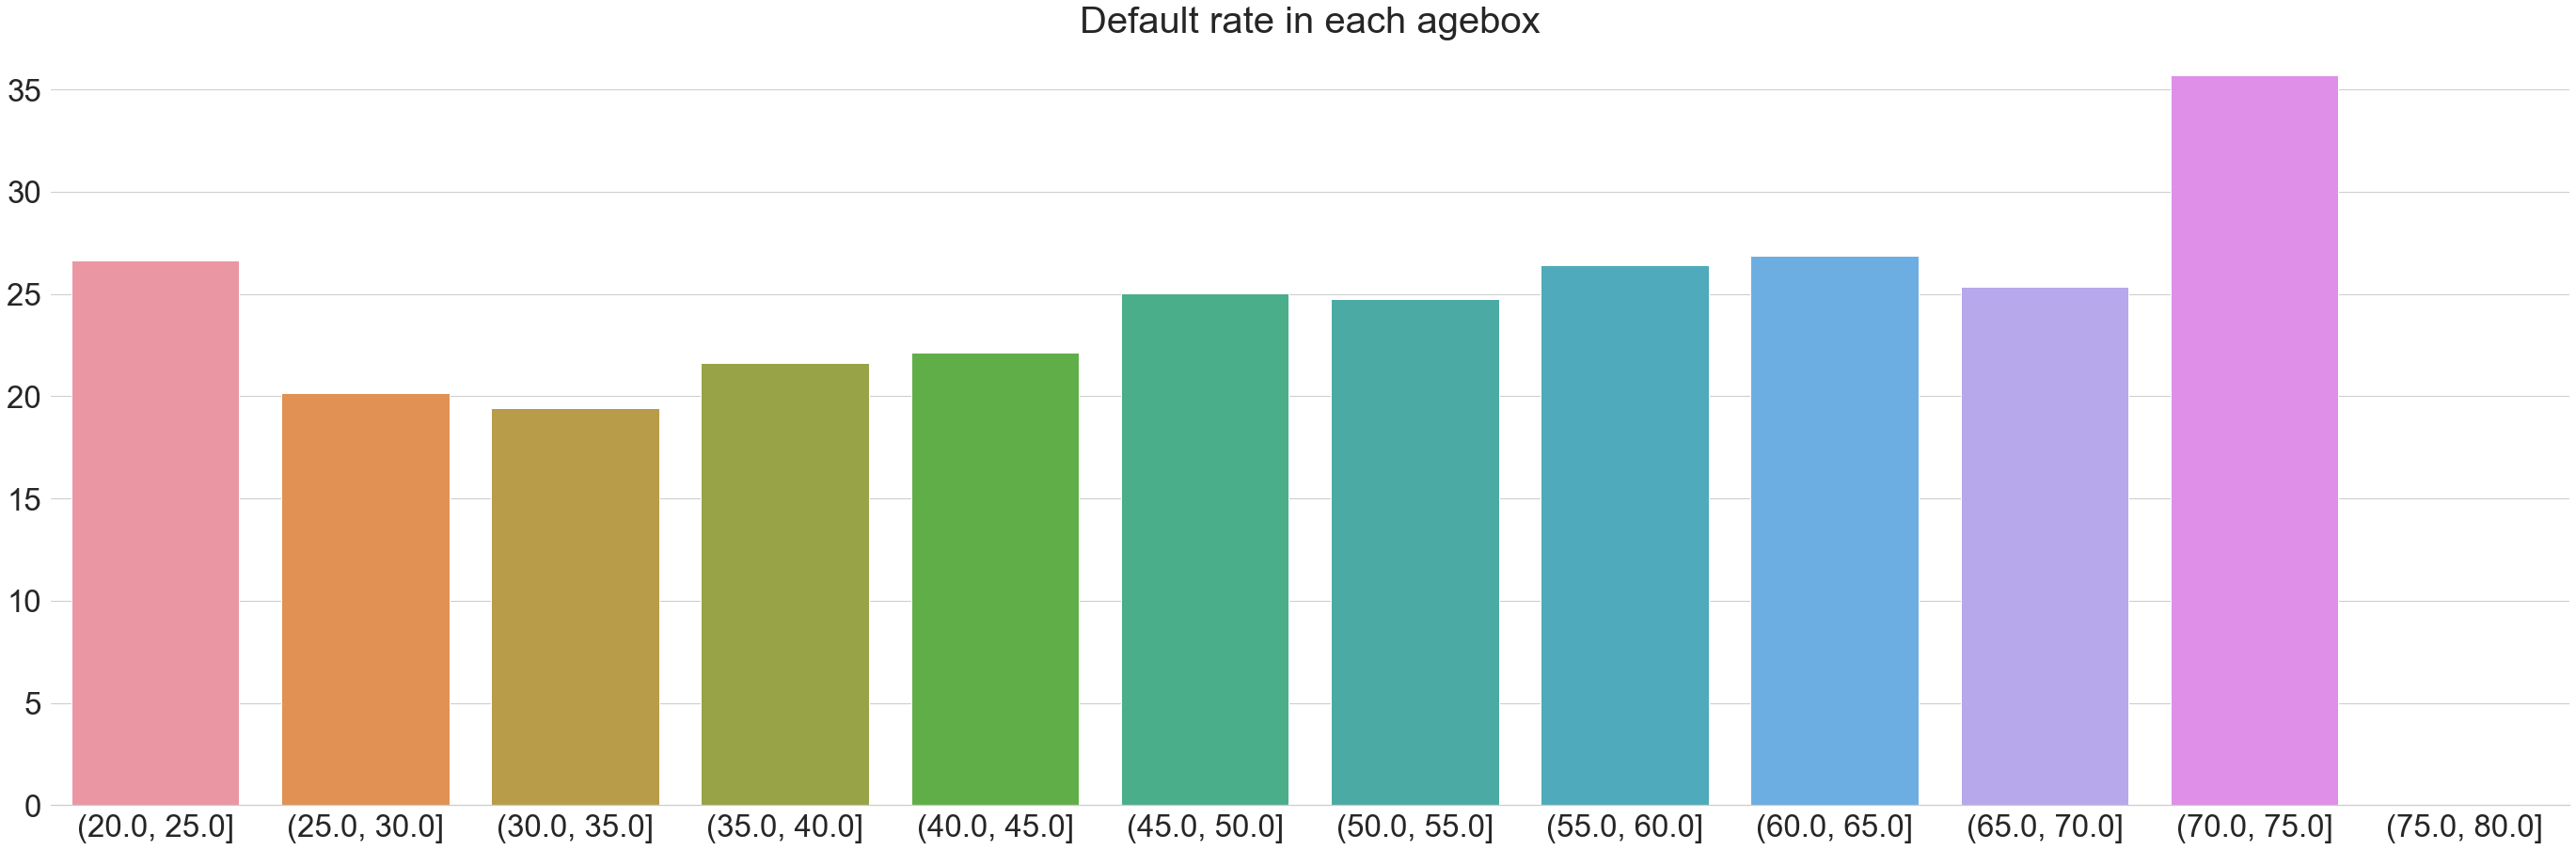

In [29]:
sns.set(style="whitegrid",font="Arial",font_scale=3)
plt.rcParams['figure.figsize'] = [48, 15]
g=sns.barplot(x=dataage1.index,y=dataage1['default']*100,data=dataage1) 
sns.despine(left=True)
g.set( ylabel="",xlabel="")
plt.title('Default rate in each agebox',size = 40)
plt.show()

#### September default rate is the highest. 
Septem default rate is much more higher than April by 10%. September is the end of shcool summer and half-year vacation time, people spend much more money in previous months like Jun-Augest and may leads to bad default rate because of overdue payments.

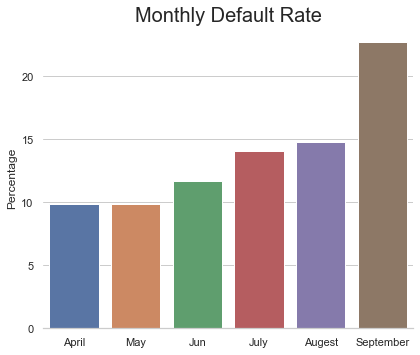

In [30]:
plt.rcParams['figure.figsize'] = [48, 20]
sns.set(style="whitegrid",font_scale=1)
g1 = sns.catplot(x="Month",y='Default rate',kind="bar",aspect=1.2,data=dfdpm,order=['April','May','Jun','July','Augest','September'])
g1.set( ylabel="Percentage",xlabel="")
sns.despine(left=True)
plt.title('Monthly Default Rate',size = 20)
plt.show()

## 5. Feature Engineering

Logically, credit card default relates more with customer's credit spends situations and repayment ability, such as credit balance limits, bill payment in each month, payment amount in each month. We can generates new features based on existing ones.

#### AgeBin
Instead of input directly to model, we can generate age bins to detect how differnt age group can impact on model. Min age is 21, max age is 79. We devied into 6 groups: 20-30, 30-40, 40-50, 50-60, 60-70, 70-80. 

In [31]:
bins = [20, 29, 39, 49, 59, 69, 80]
bins_names = [1, 2, 3, 4, 5, 6]
df['AgeBin'] = pd.cut(df['AGE'], bins, labels=bins_names)
df['AgeBin'] = pd.to_numeric(df['AgeBin']) # convert string to number 

####  limit
Same consederation for LIMIT_BAL.

In [32]:
bins = [0, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 600000, 800000, 1000000] 
bins_names = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
df['limit'] = pd.cut(df['LIMIT_BAL'], bins, labels=bins_names)
df['limit'] = pd.to_numeric(df['limit']) # convert string to number 

#### use_ratio
We'd like to explore how much credit limits used by customer in each month. Higher ratio means customer is more likely to overspent the credits and leads default. So the lower the ratio (ratio close to 0 or less) the more likely that customer pay duly. In Bill_AMT columns we noticed the minimum amount is negative, after examining some cases. It looks like customer repay more than bill amount, so it's still pay duly. 

In [33]:
df['use_ratio1']=df['BILL_AMT1']/df['LIMIT_BAL']
df['use_ratio2']=df['BILL_AMT2']/df['LIMIT_BAL']
df['use_ratio3']=df['BILL_AMT3']/df['LIMIT_BAL']
df['use_ratio4']=df['BILL_AMT4']/df['LIMIT_BAL']
df['use_ratio5']=df['BILL_AMT5']/df['LIMIT_BAL']
df['use_ratio6']=df['BILL_AMT6']/df['LIMIT_BAL']

#### overdue
Credit defaut happens when customer miss the due date to pay the bill. Furthermore, we could assume that overdue risks happends when 2 months overdue and bill balance over 150 dollars, since the currency ratio Taiwan dollar: USD 30:1, so balance here is over 4500 NT dollars.

In [34]:
df['overdue1']= np.where(((df['PAY_1']>=2)& (df['BILL_AMT1']>4500)), 1, 0)
df['overdue2']= np.where(((df['PAY_2']>=2)& (df['BILL_AMT2']>4500)), 1, 0)
df['overdue3']= np.where(((df['PAY_3']>=2)& (df['BILL_AMT3']>4500)), 1, 0)
df['overdue4']= np.where(((df['PAY_4']>=2)& (df['BILL_AMT4']>4500)), 1, 0)
df['overdue5']= np.where(((df['PAY_5']>=2)& (df['BILL_AMT5']>4500)), 1, 0)
df['overdue6']= np.where(((df['PAY_6']>=2)& (df['BILL_AMT6']>4500)), 1, 0)

#### expense
We want to monitor the monthly expense of a customer. We know that the bill amount in current month is rolling from all previous months. Let's say, if the customer doesn't pay off all the previous bills. So we need to calculate bill month in this month by deduct from previous bill amount. In that case, we can know how much money the customer spend in current month.

In [35]:
df['exp_5'] = ((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5']))) / df['LIMIT_BAL']
df['exp_4'] = ((df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4']))) / df['LIMIT_BAL']
df['exp_3'] = ((df['BILL_AMT3'] - (df['BILL_AMT4'] - df['PAY_AMT3']))) / df['LIMIT_BAL']
df['exp_2'] = ((df['BILL_AMT2'] - (df['BILL_AMT3'] - df['PAY_AMT2']))) / df['LIMIT_BAL']
df['exp_1'] = ((df['BILL_AMT1'] - (df['BILL_AMT2'] - df['PAY_AMT1']))) / df['LIMIT_BAL']

In [36]:
df.sample(20)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,limit,AgeBin,use_ratio1,use_ratio2,use_ratio3,use_ratio4,use_ratio5,use_ratio6,overdue1,overdue2,overdue3,overdue4,overdue5,overdue6,exp_5,exp_4,exp_3,exp_2,exp_1
23279,23280,360000,2,2,1,37,0,0,0,0,0,0,10072,7728,2344,9536,9043,0,7728,2344,9536,9043,0,2909,0,6,2,0.027978,0.021467,0.006511,0.026489,0.025119,0.000000,0,0,0,0,0,0,0.025119,0.026489,0.006511,0.021467,0.027978
16710,16711,30000,1,3,1,41,1,2,2,0,0,0,17301,18015,17437,18448,18815,19210,1295,0,1306,673,698,1547,0,1,3,0.576700,0.600500,0.581233,0.614933,0.627167,0.640333,0,1,1,0,0,0,0.010100,0.010200,0.009833,0.019267,0.019367
22100,22101,50000,2,2,2,28,0,0,0,0,0,0,28157,28409,27589,27875,28539,29202,1430,1770,1446,1500,1500,1073,0,1,1,0.563140,0.568180,0.551780,0.557500,0.570780,0.584040,0,0,0,0,0,0,0.016740,0.016720,0.023200,0.051800,0.023560
24702,24703,430000,1,1,2,40,0,0,0,0,0,0,2099,8256,4353,471,5779,4468,8297,4391,473,5808,4489,3934,0,7,3,0.004881,0.019200,0.010123,0.001095,0.013440,0.010391,0,0,0,0,0,0,0.013488,0.001163,0.010128,0.019288,0.004977
6277,6278,110000,2,1,2,32,1,2,0,0,0,2,58679,56871,56279,24271,52040,25453,1210,2056,1200,2300,0,1000,1,3,2,0.533445,0.517009,0.511627,0.220645,0.473091,0.231391,0,1,0,0,0,1,0.241700,-0.231536,0.301891,0.024073,0.027436
11088,11089,150000,2,2,2,29,0,0,0,0,0,0,1739,1984,112,0,3865,5562,1984,112,0,3865,5575,10963,0,3,1,0.011593,0.013227,0.000747,0.000000,0.025767,0.037080,0,0,0,0,0,0,0.025853,0.000000,0.000747,0.013227,0.011593
28195,28196,200000,2,3,1,48,0,0,0,0,0,0,119139,5844,3666,37005,47376,1292,5844,3694,37177,47376,1292,46626,0,4,3,0.595695,0.029220,0.018330,0.185025,0.236880,0.006460,0,0,0,0,0,0,0.236880,0.185025,0.019190,0.029360,0.595695
16755,16756,70000,1,2,1,35,0,0,0,0,0,0,69388,70480,66646,69641,46458,50679,3439,3237,4938,1693,5000,2200,1,2,2,0.991257,1.006857,0.952086,0.994871,0.663686,0.723986,0,0,0,0,0,0,0.011129,0.355371,0.027757,0.101014,0.033529
10753,10754,160000,2,2,1,31,0,0,0,0,0,0,42781,42774,41817,749,5572,10573,2300,2300,749,5572,5573,13793,1,4,2,0.267381,0.267338,0.261356,0.004681,0.034825,0.066081,0,0,0,0,0,0,0.003575,0.004681,0.261356,0.020356,0.014419
17466,17467,300000,2,1,1,38,0,0,0,0,0,0,2884,3558,2778,2778,5367,2589,3558,2778,2778,5367,0,3661,0,5,2,0.009613,0.011860,0.009260,0.009260,0.017890,0.008630,0,0,0,0,0,0,0.009260,0.009260,0.009260,0.011860,0.009613


### Correlation matrix 
helps us detect multicollinarity. The more independent our predictors, the more likely to generate useful model. For correlation ratios that higher than 0.8 degrees, we usually remove them from predictors, much similarity less predict power. 

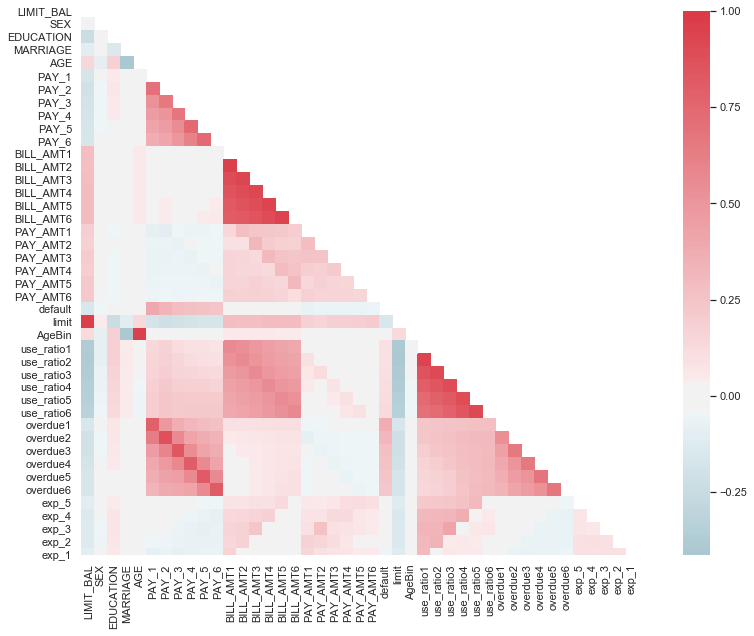

Top 5 correlated features
        level_0    level_1         0
1796  BILL_AMT5  BILL_AMT4  0.940134
1797  BILL_AMT4  BILL_AMT5  0.940134
1798  BILL_AMT5  BILL_AMT6  0.946197
1799  BILL_AMT6  BILL_AMT5  0.946197
1800  BILL_AMT2  BILL_AMT1  0.951484
1801  BILL_AMT1  BILL_AMT2  0.951484
1802        AGE     AgeBin  0.957266
1803     AgeBin        AGE  0.957266
1804  LIMIT_BAL      limit  0.967879
1805      limit  LIMIT_BAL  0.967879

 Least 5 correlated features
      level_0     level_1         0
0    PAY_AMT4  use_ratio1  0.000092
1  use_ratio1    PAY_AMT4  0.000092
2    overdue3       exp_4  0.000116
3       exp_4    overdue3  0.000116
4    PAY_AMT1         SEX  0.000242
5         SEX    PAY_AMT1  0.000242
6       PAY_1      AgeBin  0.000445
7      AgeBin       PAY_1  0.000445
8       PAY_2       exp_5  0.000782
9       exp_5       PAY_2  0.000782


In [37]:
fig = plt.figure(figsize=(16,10))
corr = df.iloc[:,1:].corr() #remove column ID
mask = np.zeros_like(corr)# Generate a mask for the upper triangle
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)# Generate a custom diverging colormap
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True)# Draw the heatmap with the mask and correct aspect ratio
plt.show()

#print top 5 and least 5 correlations 
correlations = df.iloc[:,1:].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
print("Top 5 correlated features")
print(correlations.tail(10))
print("\n Least 5 correlated features")
print(correlations.head(10))

## 6. Model 

As we discussed before, the default vs. non-default cases is approximate 8:2. We need to deal with the unbalanced data problem. We have two general methods to deal with imbalanced data:

-undersampling: drop observations of the majority class to obtain a balanced dataset. The vital problem is we will face information loss and also it is easy to overfit.

-oversampling/SMOTE: creates new synthetic points in order to have an equal balance of the classes.

In [106]:
from sklearn.cross_validation import train_test_split

#from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE#Class to perform over-sampling using SMOTE
from imblearn.metrics import classification_report_imbalanced
from collections import Counter

from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score

### Cross Validation: Split dataset into training and testing sets
When we use cross validation to split dataset into train and test, we want to make sure test set never been touched! That's why we use cross validation before the SMOTE method. SMOTE synthetic points only in training set.

In [109]:
X = df.drop(["default","ID"], axis=1).values 
y = df["default"].values 

# splitting data into 80% train and 20% test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=88, test_size=0.20)

In [110]:
X_train.shape

(24000, 42)

#### SMOTE method
We adopt over-sampling SMOTE method here instead of down-sampling, because we don't want to confront information loss. SMOTE method synthetic fake points to oversample the minal class. SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points. It selects 2 or more similar instances and perturb them one at a time by random amount. This techniques should avoid overfitting problems but it risks adding noise to the mode. We match up the minor class and equal to major class 18668.

In [111]:
# build model with SMOTE imblearn
sm = SMOTE(random_state=200, ratio = 1.0)
X_smote, y_smote = sm.fit_sample(X_train, y_train) #SMOTE method resample dataset: synetic smote_train and smote test
#smote_pipeline = make_pipeline_imb(SMOTE(random_state=200, ratio=1), RandomForestClassifier(random_state=88))#Construct a Pipeline from the given estimators.
#smote_model = smote_pipeline.fit(X_train, y_train) #SMOTE on training set
#smote_prediction = smote_model.predict(X_test) #test SMOTE on never_touched test set

#Showing the difference before and after the transformation used
print("normal data distribution: {}".format(Counter(y_train)))
print("SMOTE data distribution: {}".format(Counter(y_smote)))

C:\Users\ry2597\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


normal data distribution: Counter({0: 18668, 1: 5332})
SMOTE data distribution: Counter({0: 18668, 1: 18668})


### Measuring Performance
One common way to measure performance of such binary classification models is to calculate precision and recall. In our model, 

Accuracy: Overall, how often is the classifier correct?(TP+TN)/total

Presicion: the number of correctly predicted default customers is divided by the predicted number of default customers. It is meant to test the number of FALSE POSITIVES (predicted to be default that stayed current). TP/(TP+FP)

Recall:defined as the number of correctly predicted default customers is divided by the actual number of default customers and test the number of FALSE NEGATIVES (predicted to stay current that actually should be default). TN/(TP+FN)

F-score (f1): defined as the harmonic mean of precision and recall, and assigns higher values to methods that achieve a reasonable balance between precision and recall. (2 * recall * precision)/(recall + precision). f2 recall has a higher weight than precision, where it’s more important to classify correctly as many positive samples as possible, rather than maximizing the number of correct classifications.  

In [112]:
# the function that we will use to better evaluate the model
def print_results(headline, true_value, pred):
    print(headline)
    print("accuracy: {}".format(accuracy_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("f1: {}".format(fbeta_score(true_value, pred, beta= 1))) #f1;  

### Algorithms
We decides to use Ensemble methods to check the results. Ensemble methods combines weak tree learners to a strong learner. Here we choose one of Bagging Ensemble model: Random Forest and one of Boosting Ensemble mode: XGBost algorithms. 
#### Random Forest
As a bagging method model, random forest fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. It trains each tree model in paralle. The advantage of random forest is that no need to normalize features. because each node in the tree is simply splitting a sorted list and not comparing one feature's value to another feature's value. 

In [115]:
# GridSearchCV
param_grid = {
               'max_depth': [3,5,7,9],
              'n_estimators': [200, 400, 600],#800, 1000 
              'criterion': ['entropy', 'gini'], 
              'n_jobs' : [-1]} #using all processors

grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'f1', cv=5) # scoring use f1, k-fold cv is 5
%time grid_forest = grid_forest.fit(X_smote, y_smote) 
print(grid_forest.best_estimator_) #best: 600 estimators, gini
print(grid_forest.best_score_)

Wall time: 7min 31s
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.8017258242771055


#### Training and testing

In [99]:
# Running the fit
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


rf.fit(X_smote, y_smote)

# Printing the Training Score
print("Training score data:")
print(rf.score(X_train, y_train) )
#Testing the model 
y_pred = rf.predict(X_test)
print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print_results("\nRandom Forest: ", y_test, y_pred)

Training score data:
0.8361666666666666

Confusion Matrix: 
[[4306  390]
 [ 721  583]]

Random Forest: 
accuracy: 0.8148333333333333
precision: 0.5991778006166495
recall: 0.4470858895705521
f1: 0.5120772946859903


#### Feature Importance 
From the feature importance chart and list we can imply: 

Delayed pay status and overdue are the most importance features, which indicates that credit default is more closely affected by customers' repayment ability: how long time and how much balances the customer delayed to pay back to issuer. 

Customers' expense behavior (exp_N and use_ratioN variables) are not major reseasons to help detect credit default. 

Customers'profile predictors (SEX, EDUCATION, MARRIAGE) have impact to default decision, which also indicates that customer's repayment ability is related to their profiles. 

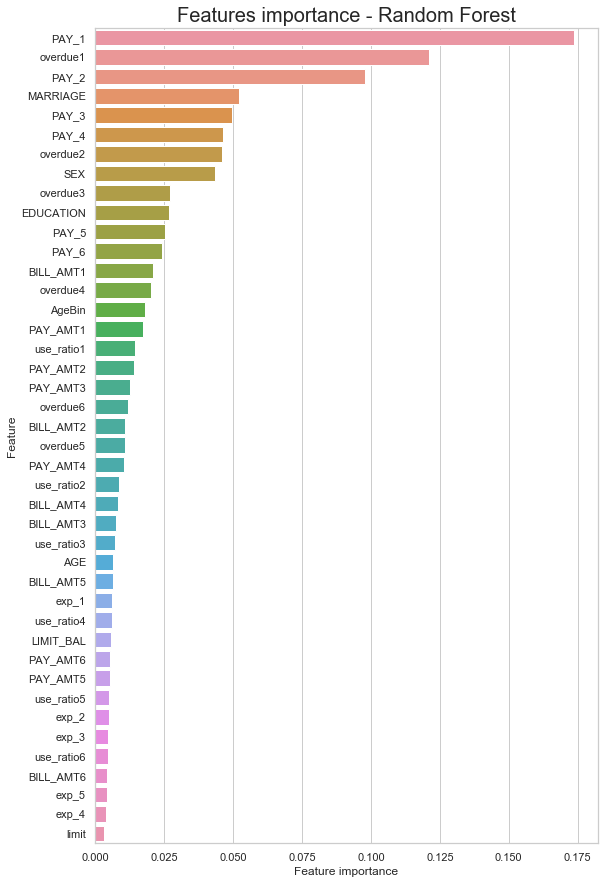

In [100]:
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
       'limit', 'AgeBin', 'use_ratio1', 'use_ratio2', 'use_ratio3',
       'use_ratio4', 'use_ratio5', 'use_ratio6', 'overdue1', 'overdue2',
       'overdue3', 'overdue4', 'overdue5', 'overdue6', 'exp_5', 'exp_4',
       'exp_3', 'exp_2', 'exp_1']

plt.figure(figsize = (9,15))
feat_import = pd.DataFrame({'Feature': features, 'Feature importance': rf.feature_importances_})
feat_import = feat_import.sort_values(by='Feature importance',ascending=False)
#feat_import=feat_import.iloc[:10,:] #if you only want top 10 importance visual please run here...

g = sns.barplot(x='Feature importance',y='Feature',data=feat_import)
#g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Features importance - Random Forest',fontsize=20)
plt.show() 

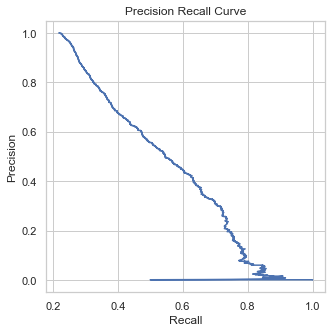

In [101]:
#Predicting probabilty
y_pred_prob = rf.predict_proba(X_test)[:,1]

# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(5,5))
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

In [102]:
#K-fold cv results: not perfect precison recall ..
results = cross_val_score(rf,X_train, y_train, cv=5, scoring='f1')
results

array([0.45805266, 0.47678795, 0.43171806, 0.45614035, 0.48326233])

#### XGBoost

XGBoost optimized gradient boosting algorithm through paraller processing, tree-pruning, handling missing values and regularization to avoid overfitting/bias. List 2 parameter tuning to have a breif look how the results will be. Need more time to train this. 

In [116]:
param_grid1 = {'n_estimators': [100,200],
              'learning_rate' : [0.5,1.0]}
grid_xgb = GridSearchCV(XGBClassifier(), param_grid1, scoring = 'f1', cv=5)
%time grid_xgb = grid_xgb.fit(X_smote, y_smote)
print(grid_xgb.best_estimator_)
print(grid_xgb.best_score_)

C:\Users\ry2597\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ry2597\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ry2597\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ry2597\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

Wall time: 3min 6s
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.5,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)
0.8026672721261223


In [117]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.5,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)


xgb.fit(X_smote, y_smote)

# Printing the Training Score
print("Training score data:")
print(xgb.score(X_train, y_train) )
#Testing the model 
y_pred = xgb.predict(X_test)
print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print_results("\nRandom Forest: ", y_test, y_pred)

Training score data:
0.8386666666666667

Confusion Matrix: 
[[4416  280]
 [ 816  488]]

Random Forest: 
accuracy: 0.8173333333333334
precision: 0.6354166666666666
recall: 0.37423312883435583
f1: 0.47104247104247104


C:\Users\ry2597\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ry2597\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


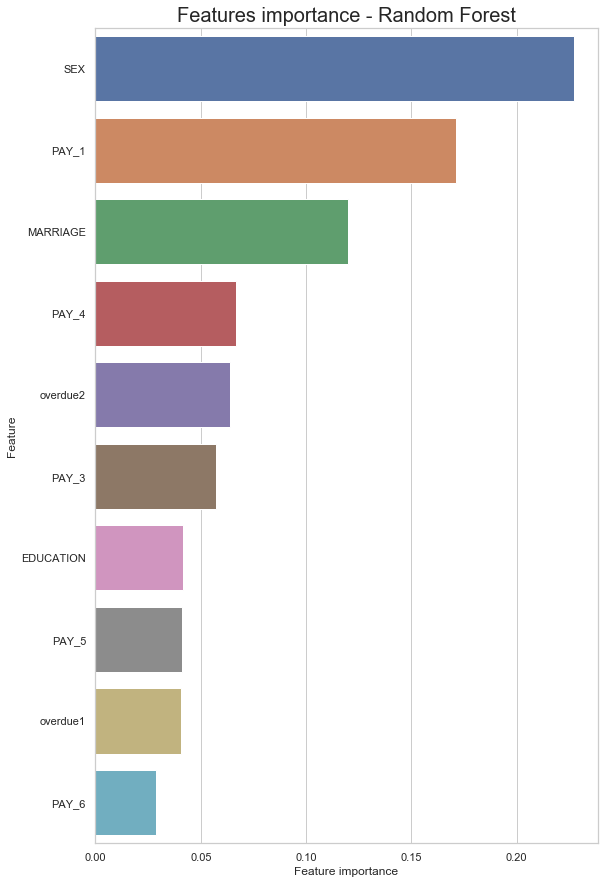

In [119]:
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
       'limit', 'AgeBin', 'use_ratio1', 'use_ratio2', 'use_ratio3',
       'use_ratio4', 'use_ratio5', 'use_ratio6', 'overdue1', 'overdue2',
       'overdue3', 'overdue4', 'overdue5', 'overdue6', 'exp_5', 'exp_4',
       'exp_3', 'exp_2', 'exp_1']

plt.figure(figsize = (9,15))
feat_import = pd.DataFrame({'Feature': features, 'Feature importance': xgb.feature_importances_})
feat_import = feat_import.sort_values(by='Feature importance',ascending=False)
feat_import=feat_import.iloc[:10,:] #if you only want top 10 importance visual please run here...

g = sns.barplot(x='Feature importance',y='Feature',data=feat_import)
#g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Features importance - Random Forest',fontsize=20)
plt.show() 

## Comments
If I had addtional time, those things may improve the project: 

1. Feature enginnering: since there are several importance features don't have proper definition, such as PAY_N variable, EDUCATION,MARRIAGE, etc. If we can get more details, we can classify and make assumptions better. We can create more new features based on data visualization, such as combine sex and education, sex and marriage by default vs. non-default rate. I also want to create more columns related to customer repayment variables ( bill, payment, pay status..)

2. Algorithms: Apply more new algorithms, such as light xgboost, KNN, SVC, Nenural network, to compare the result. Besides, random forest and Xgboost need to exmine and tune their parameters properly. 

3. Measurement: I set f1 as scoring method, however, if the issuer wants to predict which customer is more likely to default, false negatives (recall) needs to count more, we may use f2 as scoring method here. 

4. Dataset: Besides using SMOTE method (over-sampling), we can play with under-sampling. 

5. Data exploring: creates more data visualization based on differnt combination and transformation of features. We have several categorial features like EDUCATION, MARRIAGE, etc. we can test if one-hot encoding may improve some results? 
